# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import scipy.stats as stats

In [2]:
df = pd.read_csv('BostonHousing.csv')

The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
for col in df.columns:
    print(df[col].value_counts())
    print('')

14.33370    2
0.01501     2
0.08265     1
1.35472     1
0.03615     1
           ..
0.11460     1
0.03237     1
5.82115     1
0.02187     1
0.03578     1
Name: crim, Length: 504, dtype: int64

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: zn, dtype: int64

18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: indus, Length: 76, dtype: int64

0    471
1     35
Name: chas, dtype: int64

0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.435     1
0.422     1
0.518     1
0.385     1
0.389     1
Name: nox, Length: 81, dtype: int64

6.405    3
5.713    3
6.167    3
6.127    3
6.229 

In [6]:
for col in df.columns:
    print(f'-----  {col}  ------')
    print(df[col].unique())
    print('')

-----  crim  ------
[6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58400e-02
 4.37900e-02 5.78900e-02 1.35540e-01 1.28160e-01 8.82600e-02 1.58760e-01
 9.16400e-02 1.95390e-01 7.89600e-02 9.51200e-02 1.01530e-01 8.70700e-02
 5.64600e-02 8.38700e-02 4.1130

In [7]:
# Record your observations here 
# there are 13 Independent variables
# numerical: crim, indus, nox, rm, age, dis, tax, ptratio, b, lstat, zn
# categorical: chas, rad

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

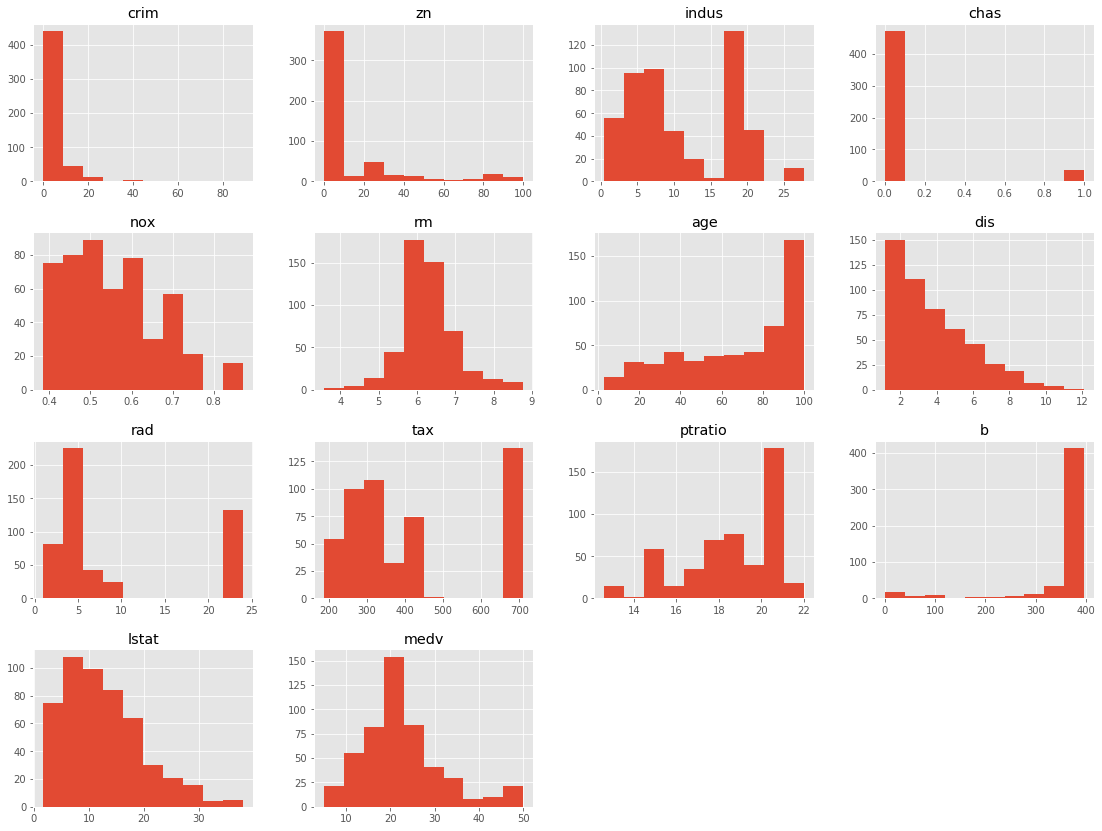

In [27]:
fig, axs = plt.subplots(4, 4, figsize=(16,12))
fig.tight_layout(pad=3.0)
for i, ax in enumerate(axs.reshape(-1)):
    if i > 13:
        ax.set_visible(False)
    else:
        ax.hist(df[df.columns[i]])
        ax.set_title(df.columns[i])
    
plt.show()

In [116]:
# You observations here 
# rm looks normalish
# medv looks normalish
# chas is a binomial
# crim, zn, dis, lstat are skewed to the left
# age, b are skewed to the right

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [28]:
df_normies = df[['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
df_normies.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check the linearity assumption for all chosen features with target variable using scatter plots

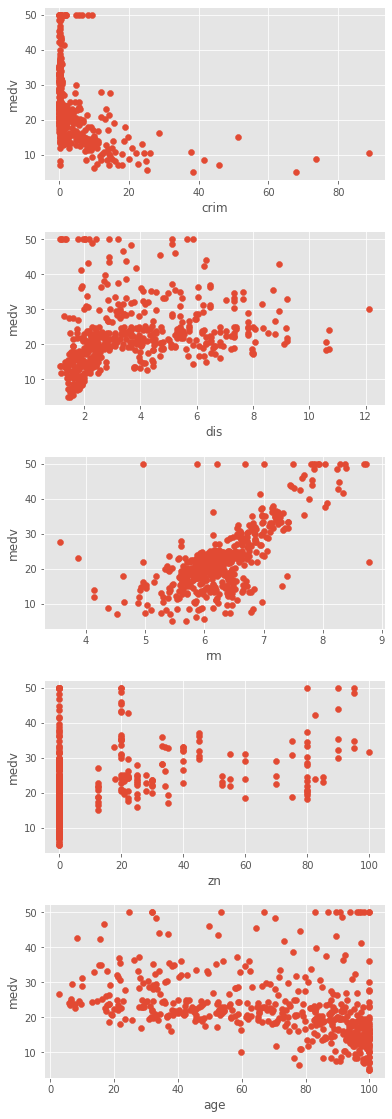

In [39]:
fig, axs = plt.subplots(5, figsize=(6, 16))
fig.tight_layout(pad=3.0)
for i, ax in enumerate(axs.reshape(-1)):
    ax.scatter(df_normies[df_normies.columns[i]], df_normies['medv'])
    ax.set_xlabel(df_normies.columns[i])
    ax.set_ylabel('medv')
plt.show()

In [ ]:
# Your observations here
# the only one that looks at all linear is rm

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

-------------- crim --------------------


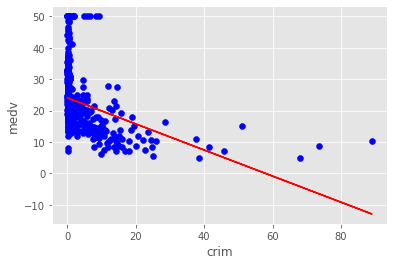

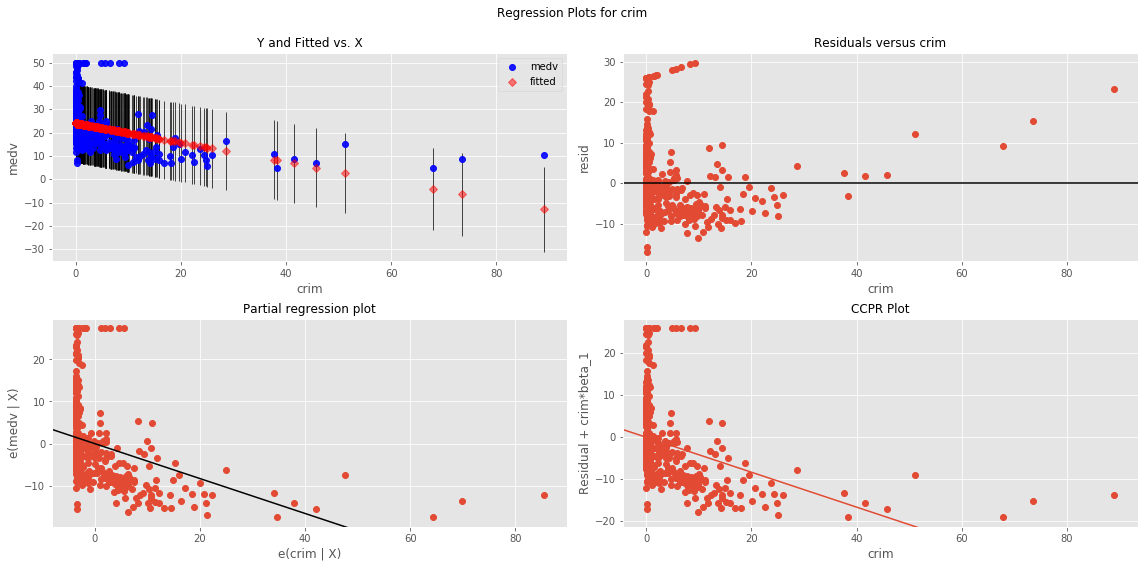

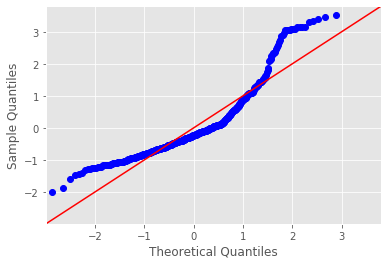


-------------- dis --------------------


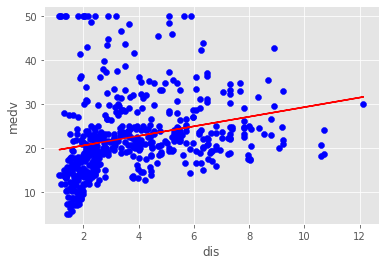

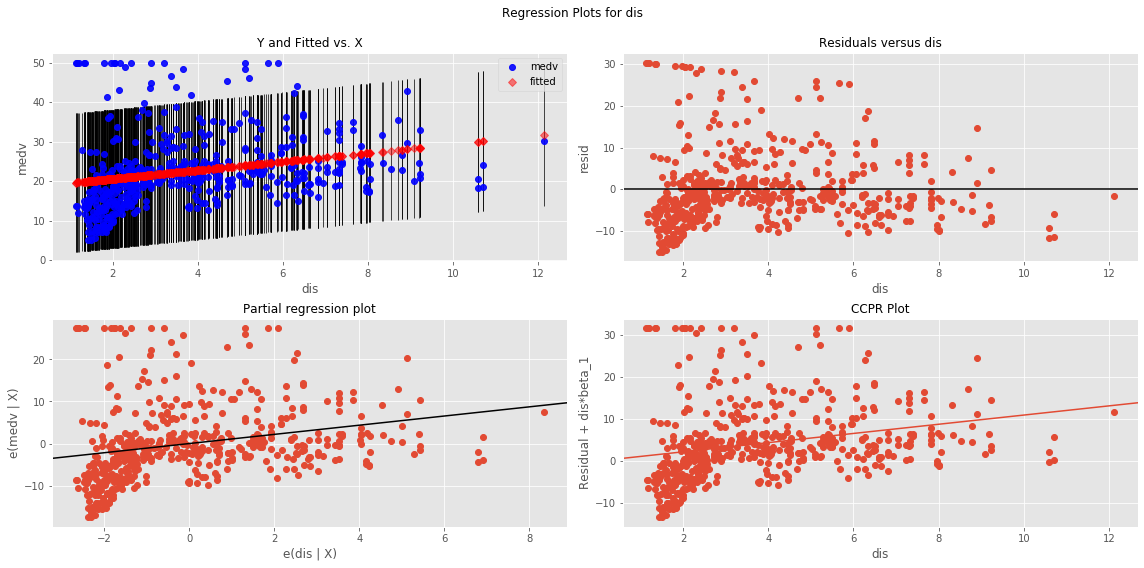

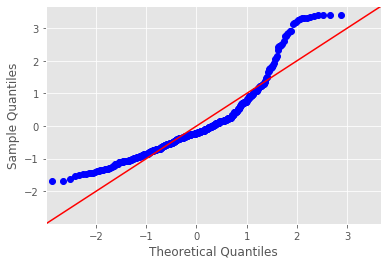


-------------- rm --------------------


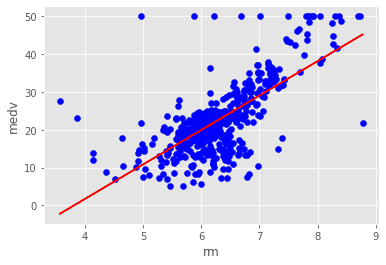

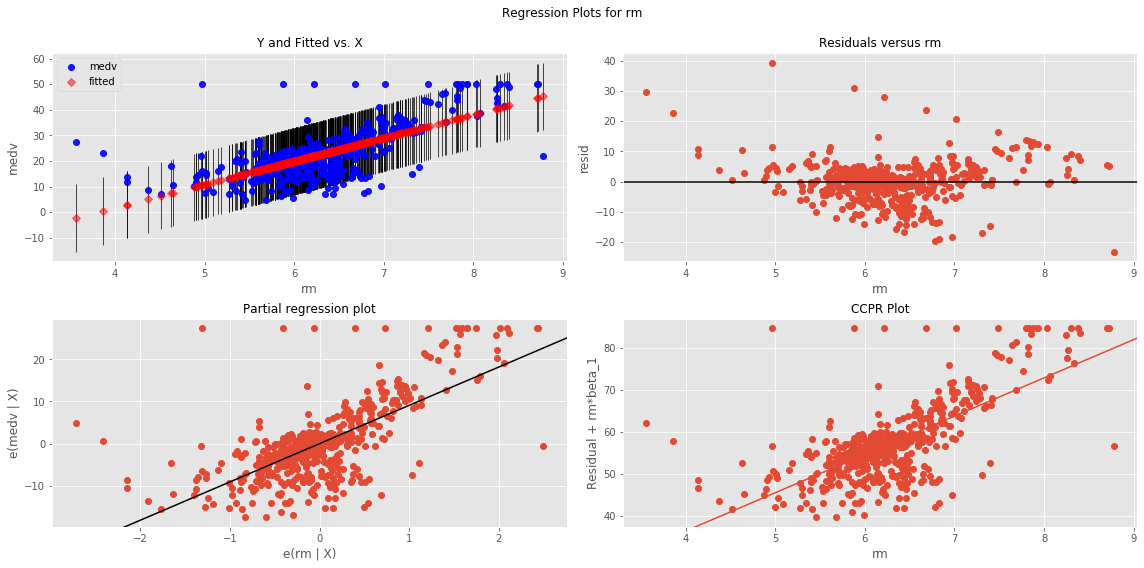

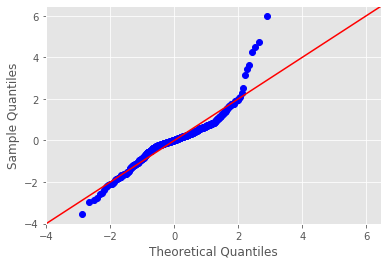


-------------- zn --------------------


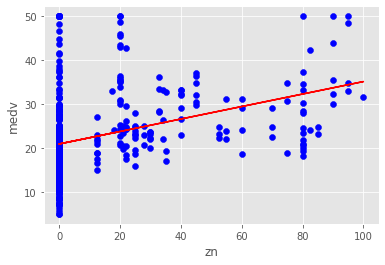

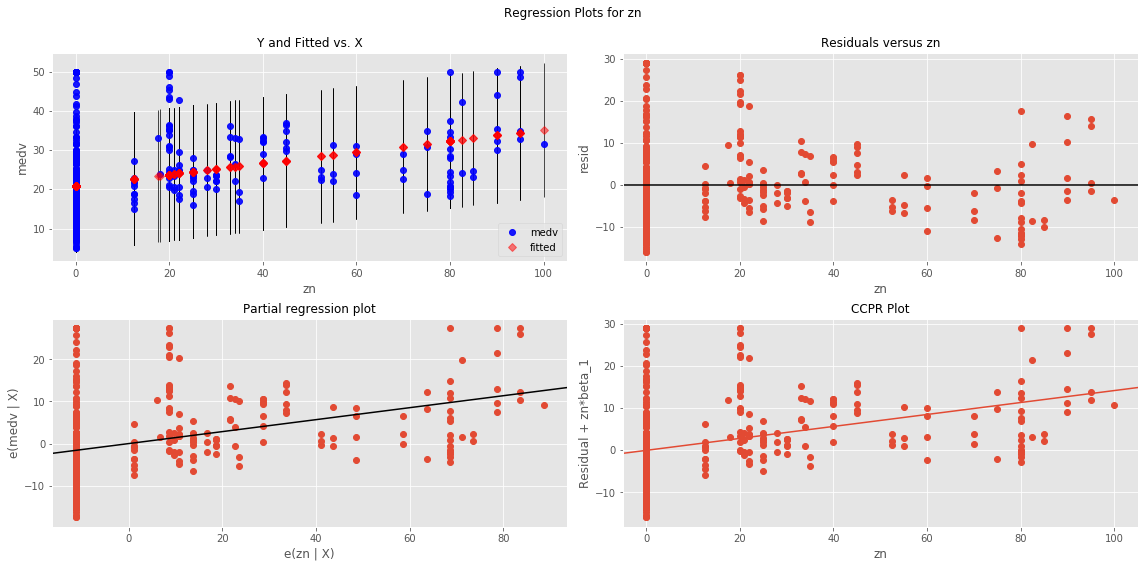

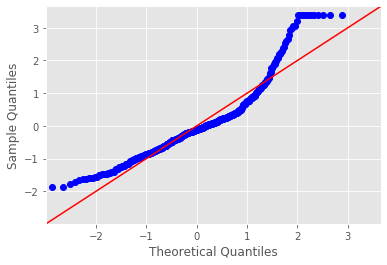


-------------- age --------------------


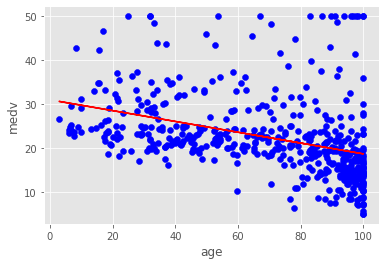

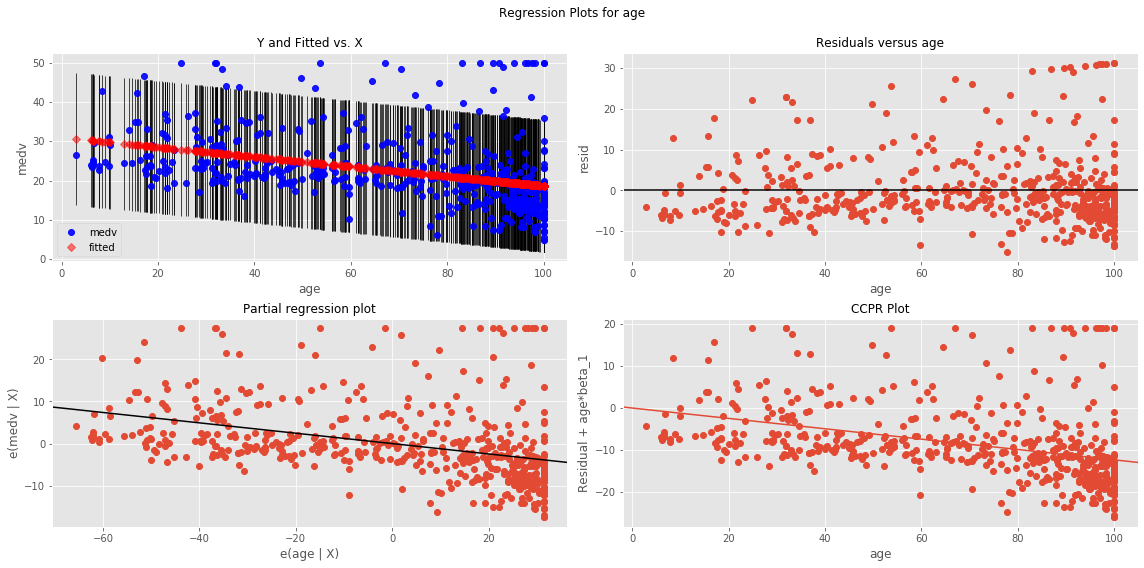

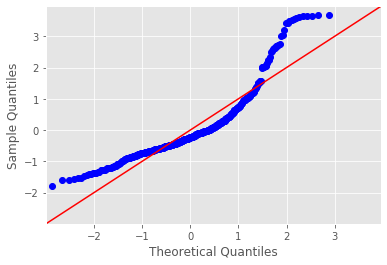

In [71]:
# plot and record the regression analysis for each independent var against 
# dependent var medv. medv is the last colomn of the df so use columns[:-1] to ignore it

results = []

for col in df_normies.columns[:-1]:
    print(f'-------------- {col} --------------------')
    # create the linear model
    f = f'medv ~ {col}'
    model = ols(formula=f, data=df_normies).fit()
    
    # plot the model with a scatter plot of the data
    fig = plt.figure()
    plt.scatter(df_normies[col], df_normies['medv'], color='blue')
    plt.plot(df_normies[col], model.predict(df_normies[col]), color='red')
    plt.xlabel(col)
    plt.ylabel('medv')
    
    
    # plot the residuals for the model
    fig = plt.figure(figsize=(16, 8))
    sm.graphics.plot_regress_exog(model, col, fig=fig)
    
    # plot a Q-Q plot of the residuals
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    
    plt.show()
    
    print('')
    
    # record results
    name = ['Jarque-Bera', 'Prob']
    jb_results = sms.jarque_bera(model.resid)
    results.append([col, model.rsquared, model.params[0], model.params[1], jb_results[0], jb_results[1]])
    
results_df = pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality(JB)'])

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~crim
-------------------------------------------------------------------------------------


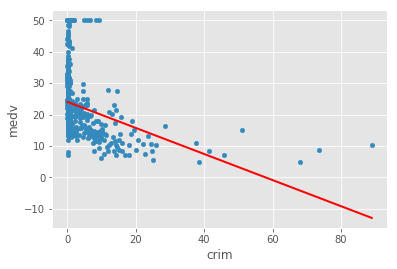

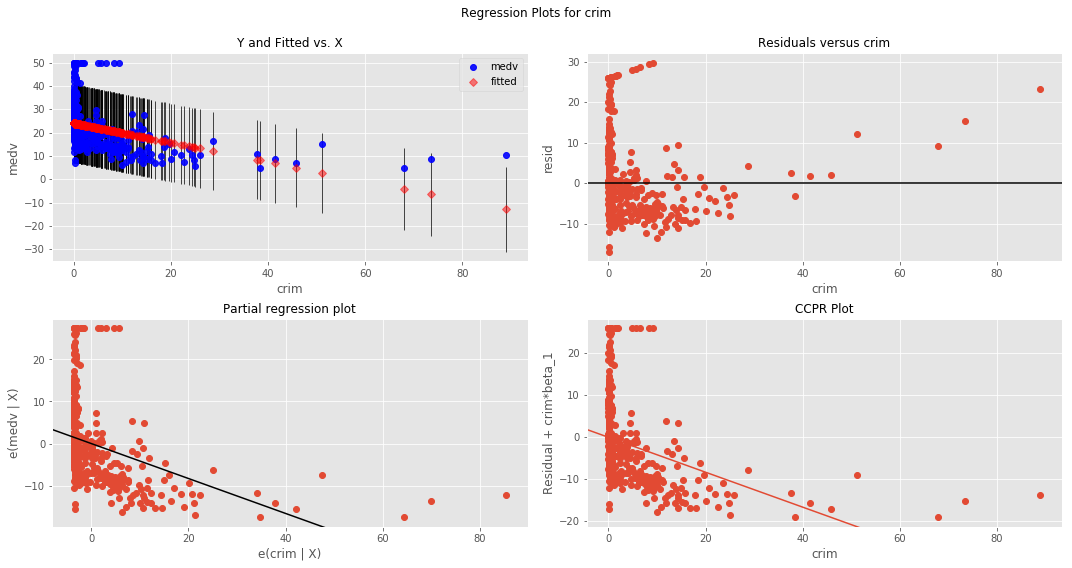

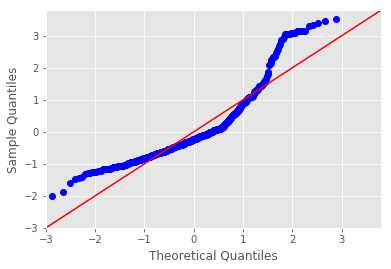

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~dis
-------------------------------------------------------------------------------------


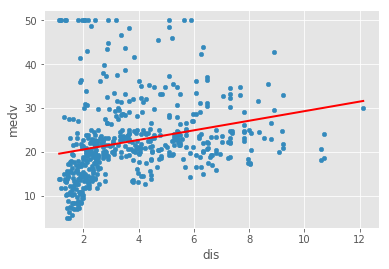

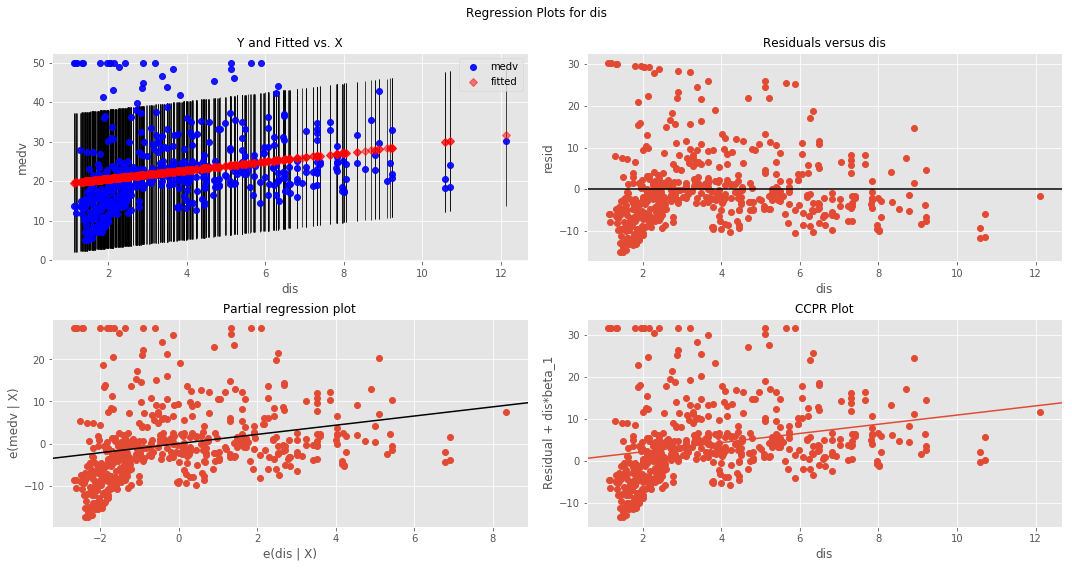

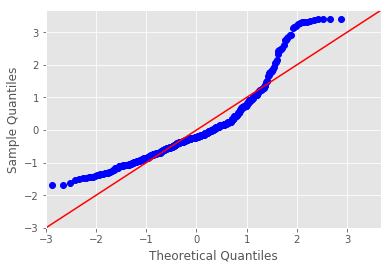

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~rm
-------------------------------------------------------------------------------------


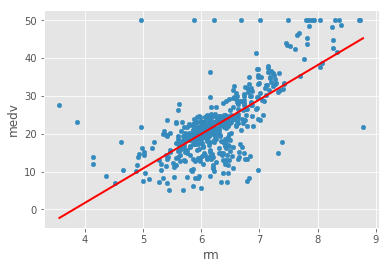

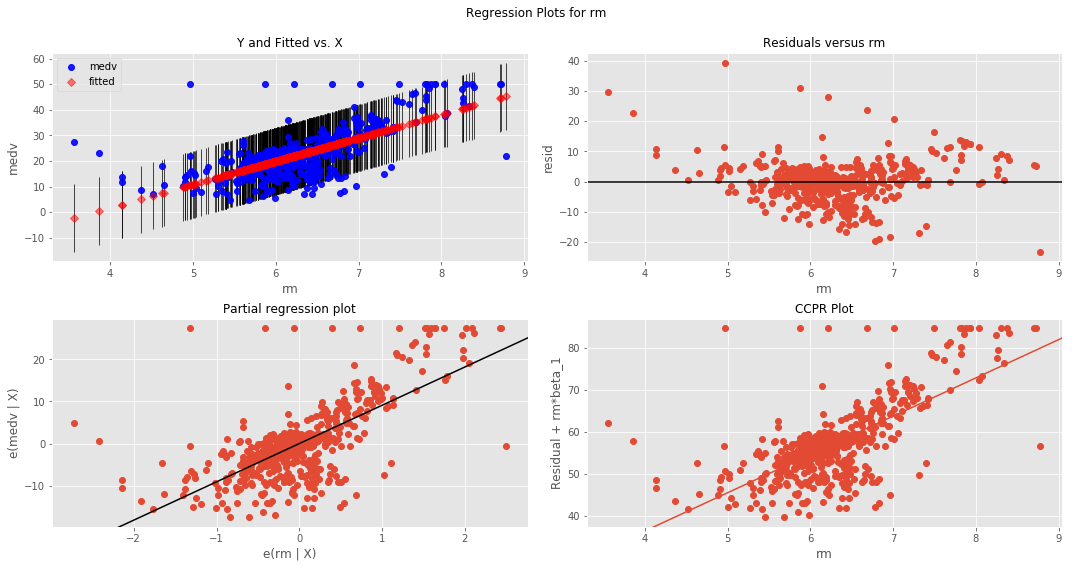

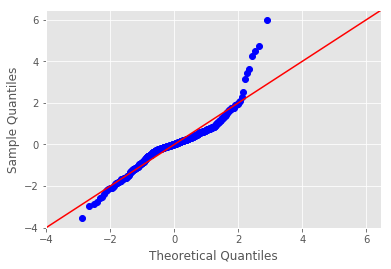

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~zn
-------------------------------------------------------------------------------------


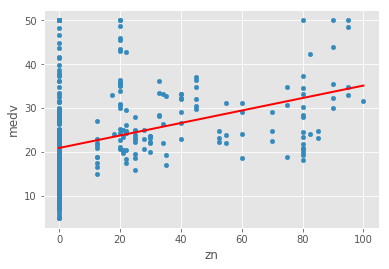

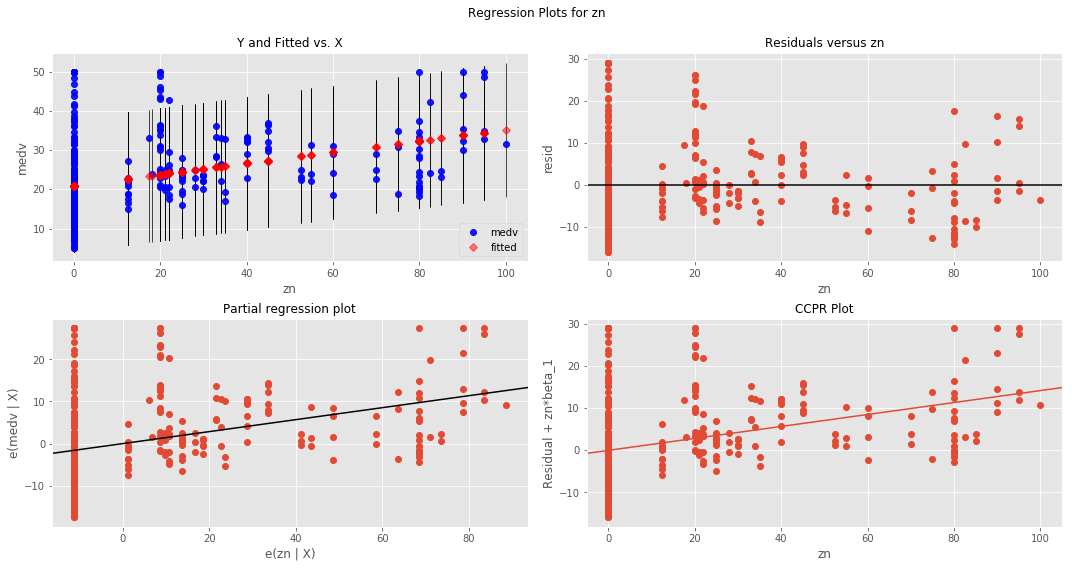

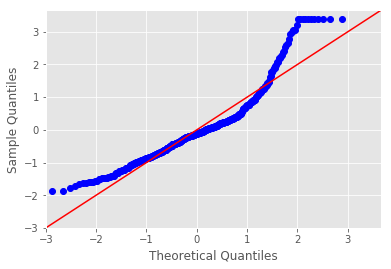

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~age
-------------------------------------------------------------------------------------


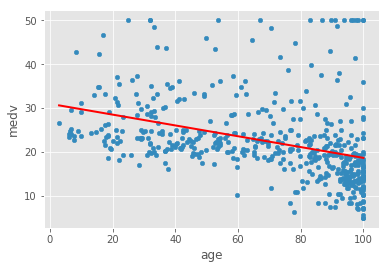

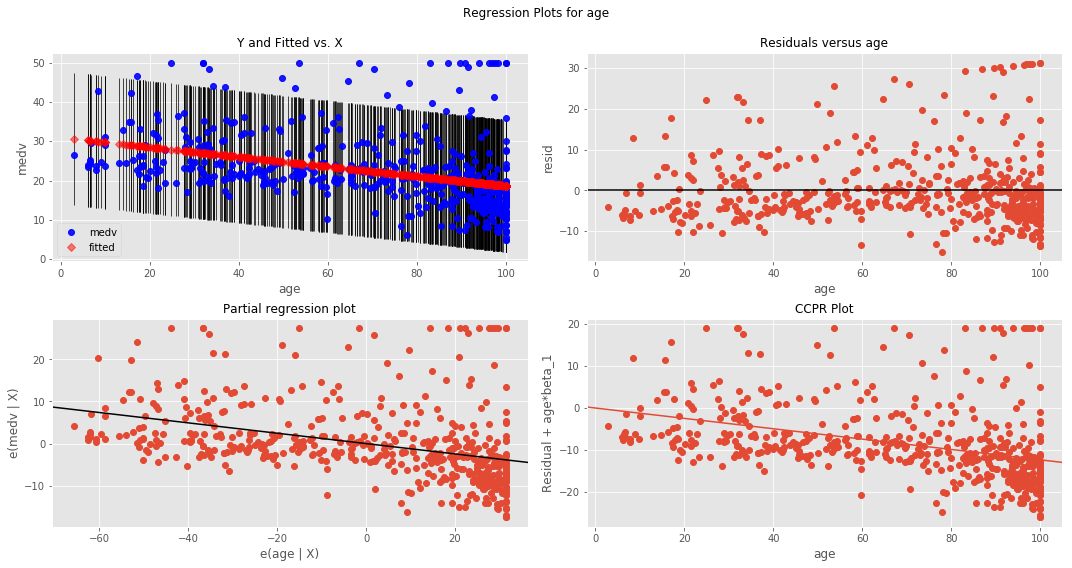

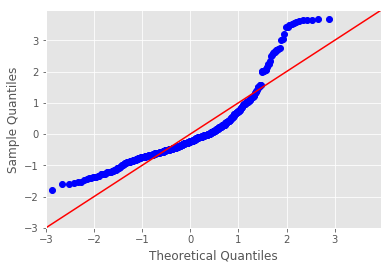

Press Enter to continue...


In [6]:
# Your code here

In [72]:
results_df

,ind_var,r_squared,intercept,slope,p-value,normality(JB)
0,crim,0.150780,24.033106,-0.415190,295.403720,7.143274e-65
1,dis,0.062464,18.390088,1.091613,305.104165,5.590780e-67
2,rm,0.483525,-34.670621,9.102109,612.448985,1.019513e-133
3,zn,0.129921,20.917579,0.142140,262.387500,1.055063e-57
4,age,0.142095,30.978678,-0.123163,456.983434,5.852053e-100


In [8]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,crim,0.15078,24.0331,-0.41519,1.17399e-19,295.404
2,dis,0.0624644,18.3901,1.09161,1.20661e-08,305.104
3,rm,0.483525,-34.6706,9.10211,2.48723e-74,612.449
4,zn,0.129921,20.9176,0.14214,5.71358e-17,262.387
5,age,0.142095,30.9787,-0.123163,1.56998e-18,456.983


In [118]:
#Your observations here 
# the results are not very good and have low R-squared values and at the same time
# b/c the data failed the OLS assumptions the R-squared value itself is not reliable

Some level Up Work, the R-squared got even worse after dropping outliers

In [90]:
rm_df = df[['rm', 'medv']]
rm_df.describe()

,rm,medv
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


In [86]:
f = f'medv ~ rm'
model = ols(formula=f, data=rm_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           2.49e-74
Time:                        15:21:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
mask = rm_df.rm[rm_df.medv > 40].index
mask

Int64Index([ 98, 157, 161, 162, 163, 166, 186, 195, 202, 203, 204, 224, 225,
            228, 232, 233, 253, 256, 257, 261, 262, 267, 268, 280, 282, 283,
            368, 369, 370, 371, 372],
           dtype='int64')

In [97]:
rm_df_clean = rm_df.drop(mask)
rm_df_clean

,rm,medv
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [102]:
mask = rm_df_clean[rm_df_clean.rm > 7].index
rm_df_clean = rm_df_clean.drop(mask)

In [107]:
mask = rm_df_clean[rm_df_clean.rm < 4].index
rm_df_clean = rm_df_clean.drop(mask)

In [108]:
rm_df_clean.describe()

,rm,medv
count,435.00000,435.000000
mean,6.10903,19.890345
std,0.47943,5.953692
min,4.13800,5.000000
25%,5.86350,15.850000
50%,6.12700,20.100000
75%,6.43100,23.300000
max,6.99800,37.200000


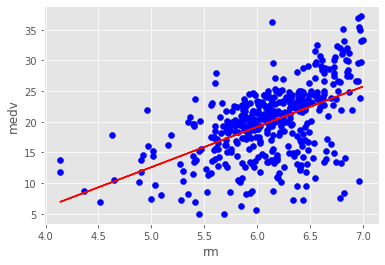

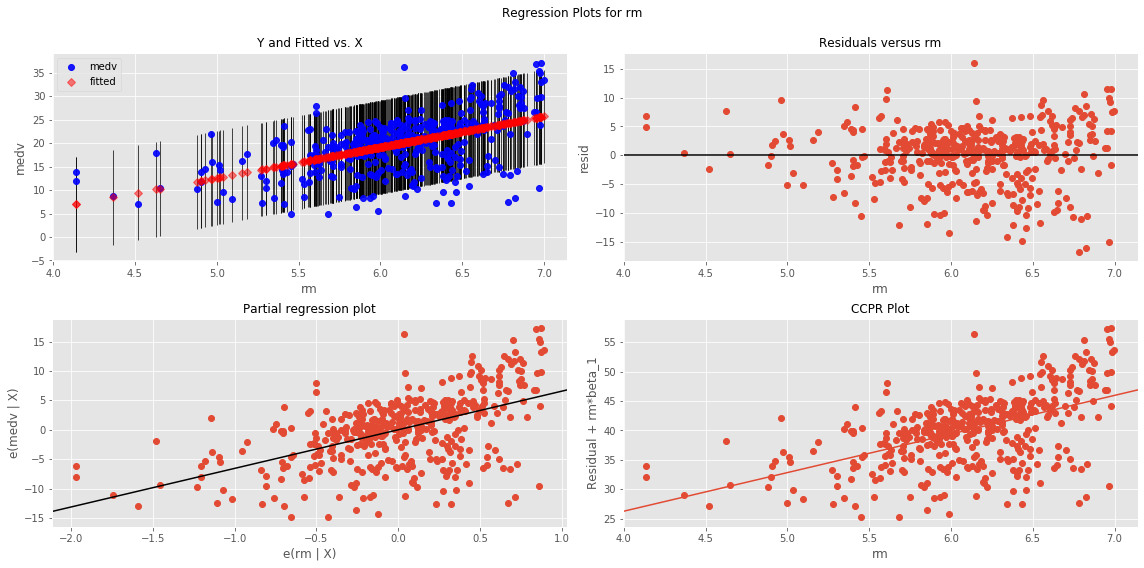

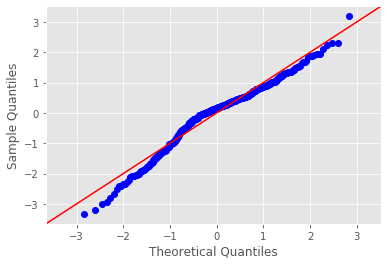

In [109]:
f = f'medv ~ rm'
model = ols(formula=f, data=rm_df_clean).fit()
col= 'rm'
# plot the model with a scatter plot of the data
fig = plt.figure()
plt.scatter(rm_df_clean[col], rm_df_clean['medv'], color='blue')
plt.plot(rm_df_clean[col], model.predict(rm_df_clean[col]), color='red')
plt.xlabel(col)
plt.ylabel('medv')


# plot the residuals for the model
fig = plt.figure(figsize=(16, 8))
sm.graphics.plot_regress_exog(model, col, fig=fig)

# plot a Q-Q plot of the residuals
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

plt.show()

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     269.9
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           2.58e-48
Time:                        15:29:50   Log-Likelihood:                -1476.7
No. Observations:                 475   AIC:                             2957.
Df Residuals:                     473   BIC:                             2966.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7707      2.610     -8.343      0.000     -26.899     -16.643
rm             6.8882      0.419     16.429      0.000       6.064       7.712
==============================================================================
Omnibus:                       26.972   Durbin-Watson:                   0.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.075
Skew:                          -0.365   Prob(JB):                     2.21e-11
Kurtosis:                       4.395   Cond. No.                         66.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.